# E-tivity 2 (12/02/24 - 25/02/24)

* Name: Paul Trayers

* Student ID: 8907021

## Outline

This e-tivity is split into two parts. The first part <a href="#part1">**Stock Predicition**</a> is a group activity where you are tasked with predicting the stock market.

The second <a href="#part2">**Sentiment Analysis**</a> is an individual task, the problem is to predict if a film review is positive or negative.

### Guidelines

The e-tivity is split into five tasks. The first four are "group" excersises, in that you post the solutions to Tasks 1-4 to the Group Locker. This will allow the members of your group to send you feedback (via the forums) so you can improve your submission. The final task is an individual task and together with the other tasks, should be uploaded to Brightspace.

Marks will be deducted if task 5 is uploaded in contravention of instructions. Also if the the final submission is not a single notebook with tasks 1-5 and with correct identification or filename.


Grading guidelines: the grades for each task are additive, max 20. Weight [5/7]

**Task 1 [0-6]**: Complete with suitable preprocessing steps. There is no unique solution but you should justify the actions you are taking.

**Task 2 [0-4]**: Complete with suitable treatment of missing values. Again there maybe more than one solution, the important thing is to justify your actions.

**Tasks 3+4 [0-4]**: Create a suitable model with correct evaluation. Test for common DL issues.

**Task 5 [0-6]**: Completion of Task 5, using the layers outlined. The purpose of the task is to demonstrate that you can construct a valid model from scratch. Direct copy and paste from the web is not acceptable.

<a id='part1'></a>
## Stock Prediction

### Context

There is a small dataset of real stock prices for each working day from the end of 2015 to the end of 2019. There are four variables (with a time stamp), stock price, oil price, gold price and Euro to Dollar exchange. You need to predict the Stock price a day ahead from only the past values of each of the 4 variables.


### Tasks 1-4 (complete by Sunday 18/02/24)

These tasks are to be completed and uploaded to GitLab on which the other group members can comment. The forum activity will form part of the overall mark for the e-tivity.

# Load Dataset

Load dataset from Google Drive.

In [ ]:
# Mount my Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

%cd /content/drive/MyDrive/cs5004/Etivities/Etivity2/
!ls -ail ./data/stock.csv

Mounted at /content/drive
/content/drive/MyDrive/cs5004/Etivities/Etivity2
236 -rw------- 1 root root 53284 Feb 14 00:13 ./data/stock.csv


In [ ]:
import pandas as pd

# Specify the path to your CSV file
file_path = './data/stock.csv'

# Load the dataset
data = pd.read_csv(file_path)
df = pd.DataFrame(data)

pd.set_option('display.max_rows', 8)
df.head(10)

,Date,Stock,Oil,EuroToDollar,Gold
0,2015-11-23,2089.409912,41.490002,0.9432,1124.7
1,2015-11-24,2084.419922,42.040001,0.9388,1131.6
2,2015-11-25,2089.300049,42.689999,0.9420,1128.4
3,2015-11-27,2088.820068,43.250000,0.9438,1114.5
...,...,...,...,...,...
6,2015-12-02,2101.709961,41.689999,0.9458,1112.4
7,2015-12-03,2080.709961,40.150002,0.9173,1120.6
8,2015-12-04,2051.239990,41.310001,0.9188,1143.2
9,2015-12-07,2090.419922,40.099998,0.9225,1134.3


# **Task 1: Data Preprocessing**

Explain any preprocessing steps you take including but not limited to reformatting and also how you have selected the training and test sets. The test set should be 20% of the whole.


## 1.1 Explore Dataset

First we explore the data through some basic descriptive analytics and visualisation.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Convert 'Date' column to datetime if it's not already.
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index of the DataFrame.
df.set_index('Date', inplace=True)

Show line plot for initial temporal view of the features over time.

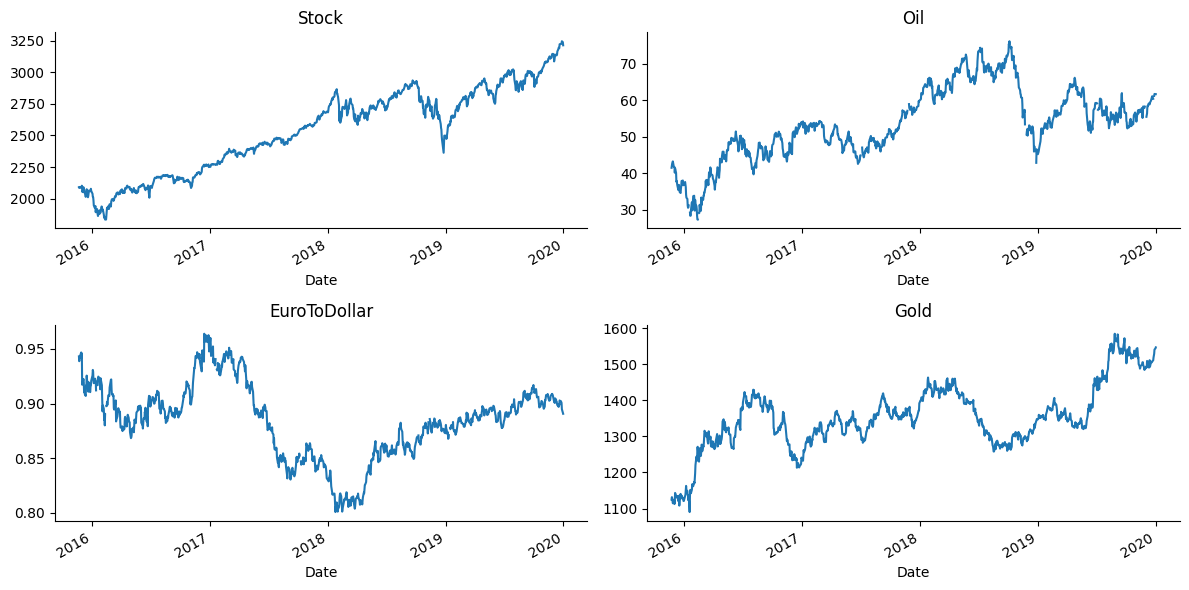

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Define columns for which to create line plots, excluding 'Date'.
columns_to_plot = ['Stock', 'Oil', 'EuroToDollar', 'Gold']

# Determine the number of rows and columns for the subplot grid.
nrows = 2
ncols = 2

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 6))  # Create a subplot for each column in a 2x2 grid.
axes = axes.flatten()  # Flatten the axes array for easy iteration.

for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    df[column].plot(kind='line', ax=ax, title=column)
    # Use DateFormatter to show year and abbreviated month on x-axis.
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    # Use MonthLocator if you want to show every month as a major tick.
    ax.xaxis.set_major_locator(mdates.YearLocator())
    # Hide the top and right spines for each subplot.
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Adjust the layout to prevent overlapping of plots
plt.tight_layout()
plt.show()


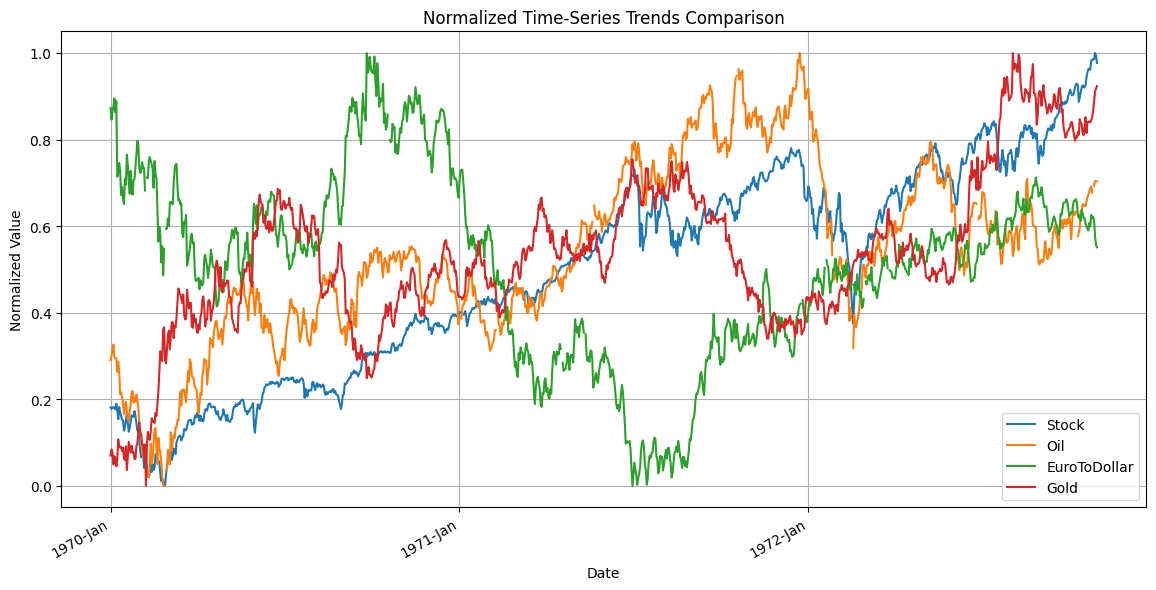

In [ ]:
# Normalize the columns to be between 0 and 1
normalized_data = (data - data.min()) / (data.max() - data.min())

# Plotting
plt.figure(figsize=(14, 7))

# Plot each normalized time-series on the same plot
for column in columns_to_plot:
    plt.plot(normalized_data.index, normalized_data[column], label=column)

# Formatting the plot
plt.title('Normalized Time-Series Trends Comparison')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid(True)

# Setting major x-axis formatter to show year and month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

plt.show()


The normalized plot shows how Stock, Oil, EuroToDollar, and Gold have trended over time on a comparable scale. Observing, there are some periods where tassets move together and others where they diverge. Stock and oil price lines appear to move in tandem while gold prices appear to rise several places when stocks fall. The hope is that Deep learning model would uncover more intricate patterns at play in order to potentially predict future stock price based on the known trends of these other variables. A "many-to-one" deep learning model leverages the historical data from all these variables to forecast future stock market movement, ideally  capturing the complex interdependencies of market dynamics.

## 1.2 Split Training / Test Data

First we divide the data into training and test sets in an 80/20 split.


In [ ]:
# Calculate the split index
training_data_len = int(len(df) * 0.8)

# Splitting the data
n_features = 2 # Date and Stock
train_df = df.iloc[:training_data_len].iloc[:,:n_features]  # select n features from the dataset
test_df = df.iloc[training_data_len:].iloc[:,:n_features]

# Print first few rows of each to verify the split.
print("Training set:\n", train_df)
print("\nTest set:\n", test_df)
print("\nThere are "+ str(train_df.shape) + " samples in the training data")
print("There are "+ str(test_df.shape) + " samples in the test data")
# Output the split index and corresponding date for verification
print(f"Split index at {training_data_len} corresponding to the date: {df.index[training_data_len]}")


Training set:
                   Stock        Oil
Date                              
2015-11-23  2089.409912  41.490002
2015-11-24  2084.419922  42.040001
2015-11-25  2089.300049  42.689999
2015-11-27  2088.820068  43.250000
...                 ...        ...
2019-03-04  2814.370117  55.830002
2019-03-05  2794.409912  56.450001
2019-03-06  2790.270020  56.279999
2019-03-07  2766.530029  56.200001

[826 rows x 2 columns]

Test set:
                   Stock        Oil
Date                              
2019-03-08  2730.790039  56.430000
2019-03-11  2747.610107  56.070000
2019-03-12  2787.340088  56.759998
2019-03-13  2799.780029  57.090000
...                 ...        ...
2019-12-26  3227.199951  61.200001
2019-12-27  3247.229980  61.730000
2019-12-30  3240.090088  61.709999
2019-12-31  3215.179932  61.680000

[207 rows x 2 columns]

There are (826, 2) samples in the training data
There are (207, 2) samples in the test data
Split index at 826 corresponding to the date: 2019-03-08 00:00

 This code creates numpy array from the “Stock” price training values. The 1-dimensional array is then transformed into a 2-dimensional array, with the shape property showing the dataset_train array’s final shape.

In [ ]:
# Selecting Stock price values from training data to create numpy array dataset_train
dataset_train = train_df.Stock.values

# Reshaping 1D array to transform to 2D array
dataset_train = np.reshape(dataset_train, (-1,1))
# Show dataset_train shape (num_rows, num_columns)
dataset_train.shape

(826, 1)

## 1.3 Normalisation

There are a number of missing values in the data. Clean the data so that it is suitable for use with the NN. Bearing in mind that we want to retain the time coherency of the data as much as possible. Explain the steps you have taken.



The data is normalized using MinMaxScaler to scale the prices/exchange rate values of features to between 0 and 1. This step is critical to performance as it helps to speed up training the network and to reach convergence faster.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
# scaling dataset
scaled_train = scaler.fit_transform(dataset_train)

print(scaled_train[:5]) # print a few records

[[0.23202753]
 [0.22750499]
 [0.23192795]
 [0.23149294]
 [0.2334233 ]]


Normalise test data in the same way.

In [ ]:
# Selecting Open Price values
dataset_test = test_df.Stock.values
# print(dataset_test)
# Reshaping 1D to 2D array
dataset_test = np.reshape(dataset_test, (-1,1))
# print(dataset_test)
# Normalizing values between 0 and 1
scaled_test = scaler.fit_transform(dataset_test)
print(*scaled_test[:5])  # unpack iterable, printing first 5 elements
print("\n", dataset_test.shape)

[0.] [0.03256926] [0.10949976] [0.13358763] [0.15411249]

 (207, 1)


# Task 2: Data Cleaning

Before handling, some features had missing values in the dataset. We will apply forward fill (propagate the last valid observation forward) and then backward fill (which fills in remaining NaN values by propagating the next valid observation backward).

In [ ]:
# Check for missing values before handling
print("Missing values before handling:")
print(df.isnull().sum())

# Handling missing values using forward fill (propagate last valid observation forward)
df.ffill(inplace=True)

# If forward fill was not sufficient (e.g., if the first values are missing), we can use backward fill
df.bfill(inplace=True)

# Check for missing values after handling
print("\nMissing values after handling:")
print(df.isnull().sum())

Missing values before handling:
Stock            0
Oil             10
EuroToDollar    12
Gold             0
dtype: int64

Missing values after handling:
Stock           0
Oil             0
EuroToDollar    0
Gold            0
dtype: int64


Following the application of forward and backward fill, there are no missing values left in the dataset.

## 2.1 Timeseries Batches

Here, we turn the time series data into a format that can be utilized to train the model for a supervised learning problem.

### 2.1.1 Sliding Window

Here we introduce a time series specific feature engineering approach of moving a window of fixed size (e.g. 50 days) across the data one timestep at a time to create overlapping subsets of the dataset. Each subset or "window" is used to predict the following value immediately after the window (e.g. 51st day). This approach allows the model to learn from a sequence of past data points (the "many") to predict a single future data point (the "one"), making it a "many-to-one" model in time series forecasting.

A loop generates input/output sequences of length 50 while iterating through the time series data. This allows us to forecast future values while taking into consideration the data's temporal dependence on prior observations. We also separate training and test data into the independent and target features ready for training; X_train, y_train, X_test, y_test.



In [ ]:
# For training dataset
X_train = []
y_train = []

for i in range(50, len(scaled_train)):
   X_train.append(scaled_train[i-50:i, 0])
   y_train.append(scaled_train[i, 0])
   if i <= 51:
      print(X_train)
      print(y_train)
      print()

[array([0.23202753, 0.22750499, 0.23192795, 0.23149294, 0.2334233 ,
       0.22615457, 0.24317534, 0.22414256, 0.19743327, 0.23294292,
       0.21750822, 0.20643299, 0.1944334 , 0.19383519, 0.16311084,
       0.17414989, 0.19313731, 0.21784367, 0.18798038, 0.16030126,
       0.1719747 , 0.18924008, 0.20856293, 0.20335158, 0.20586211,
       0.22108837, 0.20590747, 0.18561479, 0.16348246, 0.16160631,
       0.13768845, 0.10202468, 0.0840342 , 0.08558397, 0.09692208,
       0.0528205 , 0.07547857, 0.07547857, 0.05008339, 0.0387725 ,
       0.02543135, 0.03987819, 0.06605279, 0.04113799, 0.06264501,
       0.04696558, 0.05492312, 0.09384056, 0.092318  , 0.06676871])]
[0.07093788117239996]

[array([0.23202753, 0.22750499, 0.23192795, 0.23149294, 0.2334233 ,
       0.22615457, 0.24317534, 0.22414256, 0.19743327, 0.23294292,
       0.21750822, 0.20643299, 0.1944334 , 0.19383519, 0.16311084,
       0.17414989, 0.19313731, 0.21784367, 0.18798038, 0.16030126,
       0.1719747 , 0.18924008, 0.20

Transforming testing data

In [ ]:
# For testing data
X_test = []
y_test = []
for i in range(50, len(scaled_test)):
    X_test.append(scaled_test[i-50:i, 0])
    y_test.append(scaled_test[i, 0])

Convert to format suitable for input to an RNN. np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) transforms the X_train array, originally a 2-dimensional array of shape (samples, features), into a 3-dimensional array of shape (samples, time steps, features), where time steps denotes the number of time steps in the input sequence and features denotes the number of features in the input data. Size 1 is an additional dimension that serves as an indication that each time step only has a single feature.

The y_train array is transformed from a 1-dimensional array of shape (samples) into a 2-dimensional array of shape (samples, 1) by np.reshape(y_train, (y_train.shape[0], 1)), where each row represents the output value at a certain time step.

For training data.

In [ ]:
# The data is converted to Numpy array
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))
print("X_train :",X_train.shape,"y_train :",y_train.shape)


X_train : (776, 50, 1) y_train : (776, 1)


For testing data.

In [ ]:
# The data is converted to numpy array
X_test, y_test = np.array(X_test), np.array(y_test)

#Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))
print("X_test :",X_test.shape,"y_test :",y_test.shape)


X_test : (157, 50, 1) y_test : (157, 1)


# Task 3: Model Construction

Construct a RNN network that will predict the future value of Stock, one day/time interval in advance.

In [ ]:
# importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import GRU, Bidirectional
from keras.optimizers import SGD
from sklearn import metrics
from sklearn.metrics import mean_squared_error

## 3.1 RNN Model

Using the Keras API, this code creates a recurrent neural network (RNN) with four layers of basic RNNs and a dense output layer. It makes use of the tanh hyperbolic tangent activation function. To avoid overfitting, a dropout layer with a rate of 0.2 is introduced. It employs the optimizer as Adam, mean squared error as the loss function, and accuracy as the evaluation metric while compiling. With a batch size of 2, it fits the model to the training data for 20 epochs. The number of parameters in each layer and the overall number of parameters in the model are listed in a summary of the model architecture.

In [ ]:
# initializing the RNN
regressor = Sequential()

# adding RNN layers and dropout regularization
regressor.add(SimpleRNN(units = 50,
						activation = "tanh",
						return_sequences = True,
						input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50,
						activation = "tanh",
						return_sequences = True))

regressor.add(SimpleRNN(units = 50,
						activation = "tanh",
						return_sequences = True))

regressor.add( SimpleRNN(units = 50))

# adding the output layer
regressor.add(Dense(units = 1,activation='sigmoid'))

# compiling RNN
regressor.compile(optimizer = SGD(learning_rate=0.01,
								#decay=1e-6, deprecated
								momentum=0.9,
								nesterov=True),
				loss = "mean_squared_error")

# fitting the model
regressor.fit(X_train, y_train, epochs = 20, batch_size = 2)
regressor.summary()


Epoch 1/20
388/388 [==============================] - 17s 36ms/step - loss: 0.0081
Epoch 2/20
388/388 [==============================] - 17s 43ms/step - loss: 0.0027
Epoch 3/20
388/388 [==============================] - 14s 37ms/step - loss: 0.0022
Epoch 4/20
388/388 [==============================] - 14s 36ms/step - loss: 0.0021
Epoch 5/20
388/388 [==============================] - 14s 36ms/step - loss: 0.0018
Epoch 6/20
388/388 [==============================] - 16s 41ms/step - loss: 0.0016
Epoch 7/20
388/388 [==============================] - 14s 37ms/step - loss: 0.0015
Epoch 8/20
388/388 [==============================] - 14s 36ms/step - loss: 0.0015
Epoch 9/20
388/388 [==============================] - 14s 36ms/step - loss: 0.0014
Epoch 10/20
388/388 [==============================] - 14s 36ms/step - loss: 0.0014
Epoch 11/20
388/388 [==============================] - 14s 36ms/step - loss: 0.0012
Epoch 12/20
388/388 [==============================] - 14s 36ms/step - loss: 0.0012
E

# Task 4: test

Evaluate the model on the test set and display any change in accuracy over time, if any. Test for common issues found in deep learning models.


The X_test data is used to make predictions from all three models.

In [ ]:
print(X_test.shape)

# predictions with X_test data
y_RNN = regressor.predict(X_test)


(157, 50, 1)
5/5 [==============================] - 1s 18ms/step


The predicted values are transformed back from the normalized state to their original scale using the inverse_transform() function.

In [ ]:
# scaling back from 0-1 to original
y_RNN_O = scaler.inverse_transform(y_RNN)

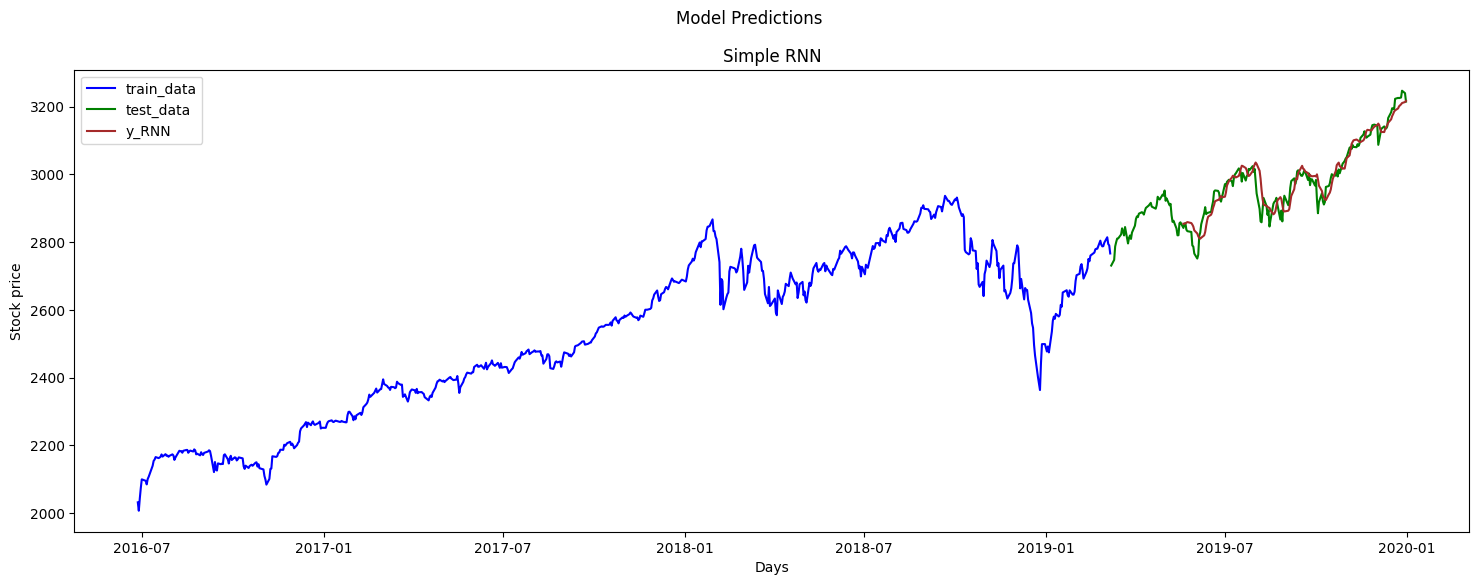

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Adjusting the plot according to the updated request
fig, ax = plt.subplots(figsize =(18,6))
fig.suptitle('Model Predictions')

#Plot for RNN predictions
ax.plot(train_df.index[150:], train_df.Stock[150:], label = "train_data", color = "b")
ax.plot(test_df.index, test_df.Stock, label = "test_data", color = "g")
ax.plot(test_df.index[50:], y_RNN_O, label = "y_RNN", color = "brown")
ax.legend()
ax.set_title("Simple RNN")
ax.set_xlabel("Days")
ax.set_ylabel("Stock price")

plt.show()

### Post (complete by Sunday 18/02/24)

Post your solution to Tasks 1-4 in notebook form. If you have not completed all the tasks then that is acceptable. The purpose is to get feedback from others in the group, so if you have only a basic outline then you may get ideas about how to proceed and also examples from others in your group.

No posts should reference Task 5.

### Respond (complete by Wednesday 21/02/24)

If you feel you can provide useful advise then respond to another member of the group through the appropriate forum. Responses should be respectful and offer some sort of advise. Try and avoid clogging the forums with support or thank you messages.

In reviewing others code you will discover different ways to tackle the same problem. It is acceptable to copy parts of others code. However whole scale copying from another notebook is not acceptable.

Grading guidelines for the forum posts: Weight [2/7]

**Beginning [0-8]:** Respectful posts of minor value. Significant number of posts without valuable contributions and/or without well-considered questions. Posts about task 5 in contravention of instructions.

**Developing [9-12]:** At least 1 post  exceeding Beginning level with respectful suggestion or thought provoking question. Most posts contain valuable contributions or well-considered questions.

**Advancing [13-16]:** At least 2 posts: equal to or exceeding Beginning level;  with respectful and sound contribution highlighting mistakes or alternative approaches.

**Accomplished [17-20]:** At least 3 posts: equal to or exceeding Accomplished level; with respectful contribution of significant value.

<a id='part2'></a>
## Sentiment Analysis


This task is a individual task and should **not** to be uploaded to the Group Locker. No posts should be given via the forums. Marks will be deducted if the instructions are not followed (see rubrics). This part should be uploaded directly to Brightpsace.

### Context

You have a model that predicts the sentiment of a film review (positive or negative) from the IMDB. There are two hyperparameters that format the data from IMDB: the maximum review length and the dictionary size. Below is a RNN model that predicts sentiment values.


### Task 5:  (completed by Sunday 25/02/24)

Keeping top_words, max_review_lenngth and the embedding_vector_length the same, change the model so that it uses attention only, i.e. there are no recurrent components. The only Keras layers (defined here https://www.tensorflow.org/api_docs/python/tf/keras/layers) that you allowed to use are:
- Input,
- Embedding,
- Dense,
- Any Attention (must be at leat one),
- TimeDistributed,
- Any Merging,
- Any Reshaping,
- Any Pooling,
- Dropout.

You need not use any of the layers (except attention) but you can use some more than once. Can you do at least as good as the RNN example?

**NB** There are many examples of using attention for sentiment analysis but we looking to see if you can construct a sensible model. The model will be delibrately restricted, so do not waste too much time achieving spectacular accuracy. Remember the rules of thumb that we discussed in the Introduction to DL module.


In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import plot_model

import matplotlib.pyplot as plt
import numpy as np

top_words = 100
(Rev_train, Sc_train), (Rev_test, Sc_test) = imdb.load_data(num_words=top_words)

max_review_length = 500
X_train = sequence.pad_sequences(Rev_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(Rev_test, maxlen=max_review_length)
print(X_train.shape)

17464789/17464789 [==============================] - 0s 0us/step
(25000, 500)


In [ ]:
embedding_vector_length = 16
model_imdb = Sequential()
model_imdb.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model_imdb.add(Dropout(0.2))
model_imdb.add(LSTM(10))
model_imdb.add(Dropout(0.2))
model_imdb.add(Dense(1, activation='sigmoid'))
model_imdb.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_imdb.summary())
plot_model(model_imdb,show_shapes=True)


The history for the model above has been saved, as it takes a while to run. If you want to run it yourself then comment out the second line.


In [ ]:
nepoch = 150
#IMDB_history = model_imdb.fit(X_train,Sc_train,validation_data=(X_test,Sc_test),epochs=nepoch,batch_size=256)
IMDB_history=np.load('IMDBTrainhist.npy',allow_pickle='TRUE').item()
plt.plot(range(nepoch),IMDB_history['loss'],c='r')
plt.plot(range(nepoch),IMDB_history['val_loss'],c='b')
plt.plot()

In [ ]:
plt.plot(range(nepoch),IMDB_history['accuracy'],c='r')
plt.plot(range(nepoch),IMDB_history['val_accuracy'],c='b')
plt.plot()

### Final Submission (complete by Sunday 25/02/24)

Submit Tasks 1-5 in a single notebook this before the deadline on Sunday.


In [ ]:
## Add additional code cells to implememt the tasks stated above

## Reflection

There are no specific marks allocated for a reflection. However due consideration will be given if pertinent comments or valuable insights are made.